In [308]:
import warnings

In [309]:
warnings.filterwarnings('ignore')

In [310]:
import pandas as pd

In [311]:
import numpy as np

In [312]:
df=pd.read_csv('WineQT.csv')

In [313]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


# EDA

In [314]:
df.shape

(1143, 13)

In [315]:
df.isnull().sum().any()

False

In [316]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [317]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

In [318]:
print(df.groupby('quality').size())

quality
3      6
4     33
5    483
6    462
7    143
8     16
dtype: int64


In [319]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [320]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


In [321]:
import warnings

In [322]:
warnings.filterwarnings('ignore')

In [323]:
import matplotlib.pyplot as plt

In [324]:
import seaborn as sns

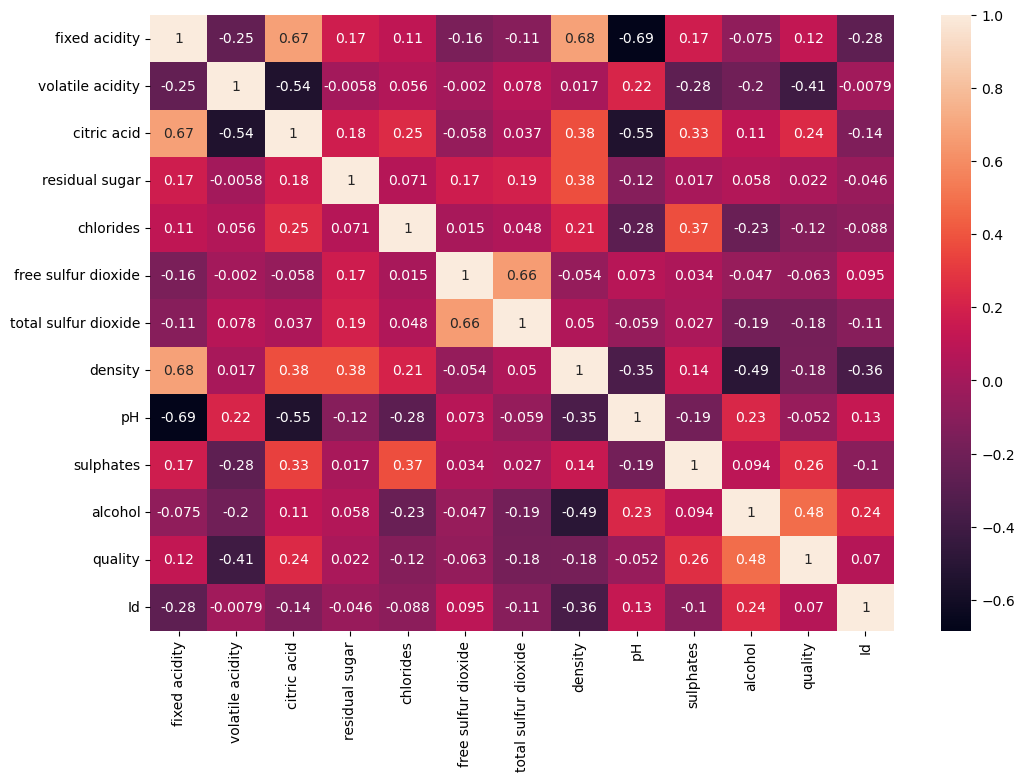

In [325]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [326]:
df.skew()

fixed acidity           1.044930
volatile acidity        0.681547
citric acid             0.371561
residual sugar          4.361096
chlorides               6.026360
free sulfur dioxide     1.231261
total sulfur dioxide    1.665766
density                 0.102395
pH                      0.221138
sulphates               2.497266
alcohol                 0.863313
quality                 0.286792
Id                     -0.010419
dtype: float64

<Figure size 1200x800 with 0 Axes>

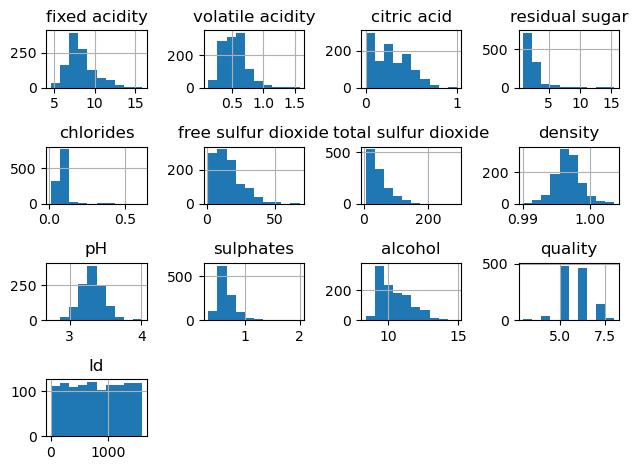

In [327]:
plt.figure(figsize=(12,8))
df.hist()
plt.tight_layout()
plt.show()

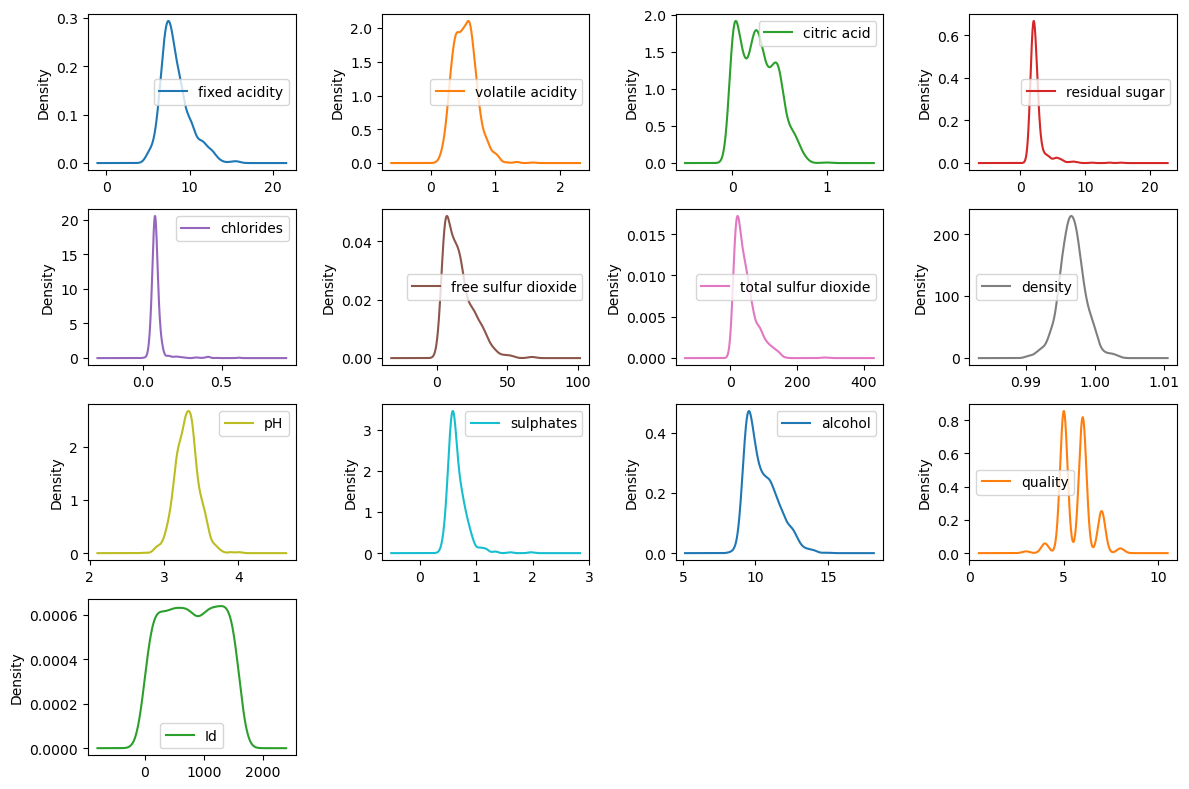

In [328]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False,figsize=(12,8))
plt.tight_layout()
plt.show()

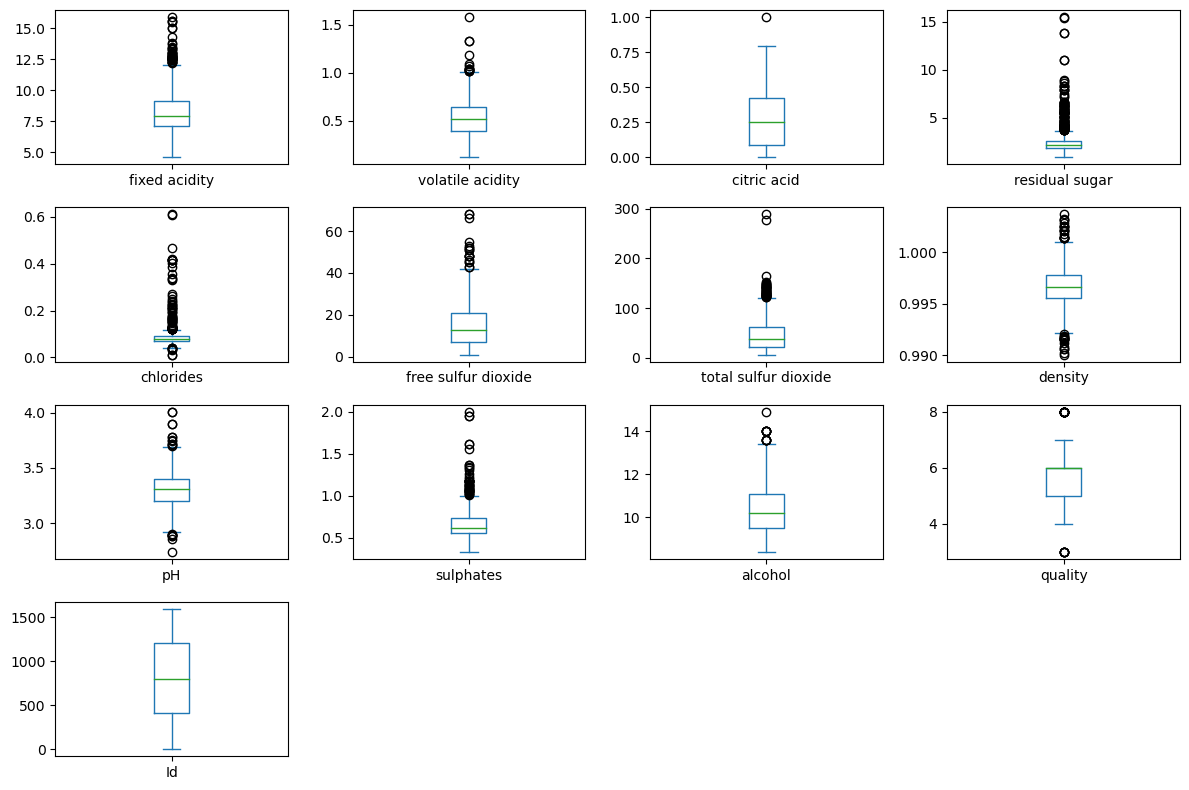

In [329]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,figsize=(12,8))
plt.tight_layout()
plt.show()

In [330]:
from pandas.plotting import scatter_matrix

In [331]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [332]:
df.shape

(1143, 13)

In [333]:
import matplotlib.pyplot as plt

In [334]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [335]:
classes = df['quality'].values

In [336]:
classes

array([5, 5, 5, ..., 5, 6, 5])

In [337]:
unique,counts = np.unique(classes,return_counts=True)

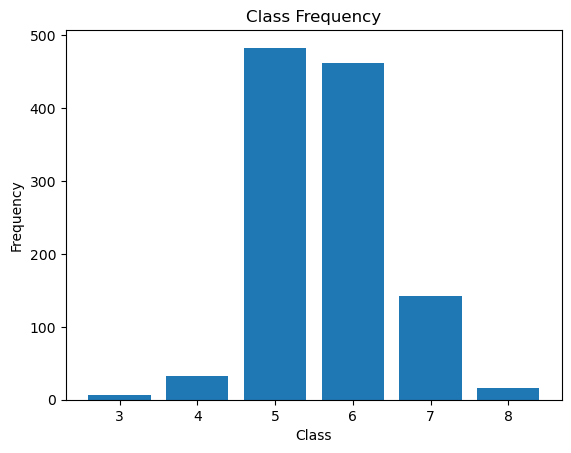

In [338]:
plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [339]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [340]:
x=df.drop('quality',axis=1)
y=df['quality']

In [341]:
x,y

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4             0.700         0.00             1.9      0.076   
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 4               7.4             0.700         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 1138            6.3             0.510         0.13             2.3      0.076   
 1139            6.8             0.620         0.08             1.9      0.068   
 1140            6.2             0.600         0.08             2.0      0.090   
 1141            5.9             0.550         0.10             2.2      0.062   
 1142            5.9             0.645         0.12             2.0      0.075   
 
       free su

In [342]:
from sklearn.model_selection import train_test_split

In [343]:
from imblearn.over_sampling import SMOTE

In [344]:
from sklearn.model_selection import train_test_split

In [345]:
 # Split-out validation dataset
 validation_size = 0.20

In [346]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=validation_size)

In [347]:
smote = SMOTE()

In [348]:
Xtrain.shape,Ytrain.shape

((914, 12), (914,))

In [349]:
#from imblearn.over_sampling import SMOTE

# Adjust the number of neighbors
#smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=2)

#XtrainResampled, YtrainResampled = smote.fit_resample(Xtrain, Ytrain)


In [350]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
XtrainResampled, YtrainResampled = ros.fit_resample(Xtrain, Ytrain)

In [351]:
#XtrainResampled,YtrainResampled = smote.fit_resample(Xtrain,Ytrain)

In [352]:
Xtrain.shape,Ytrain.shape

((914, 12), (914,))

In [353]:
XtrainResampled.shape,YtrainResampled.shape

((2322, 12), (2322,))

In [354]:
Ytrain.unique

<bound method Series.unique of 1040    4
508     5
535     5
82      6
132     6
       ..
211     6
435     5
595     6
401     5
945     6
Name: quality, Length: 914, dtype: int64>

In [355]:
YtrainResampled.unique

<bound method Series.unique of 0       4
1       5
2       5
3       6
4       6
       ..
2317    8
2318    8
2319    8
2320    8
2321    8
Name: quality, Length: 2322, dtype: int64>

In [356]:
Ytrain

1040    4
508     5
535     5
82      6
132     6
       ..
211     6
435     5
595     6
401     5
945     6
Name: quality, Length: 914, dtype: int64

In [357]:
from collections import Counter

In [358]:
Counter(YtrainResampled)

Counter({4: 387, 5: 387, 6: 387, 8: 387, 7: 387, 3: 387})

In [359]:
import seaborn as sns

In [360]:
import matplotlib.pyplot as plt

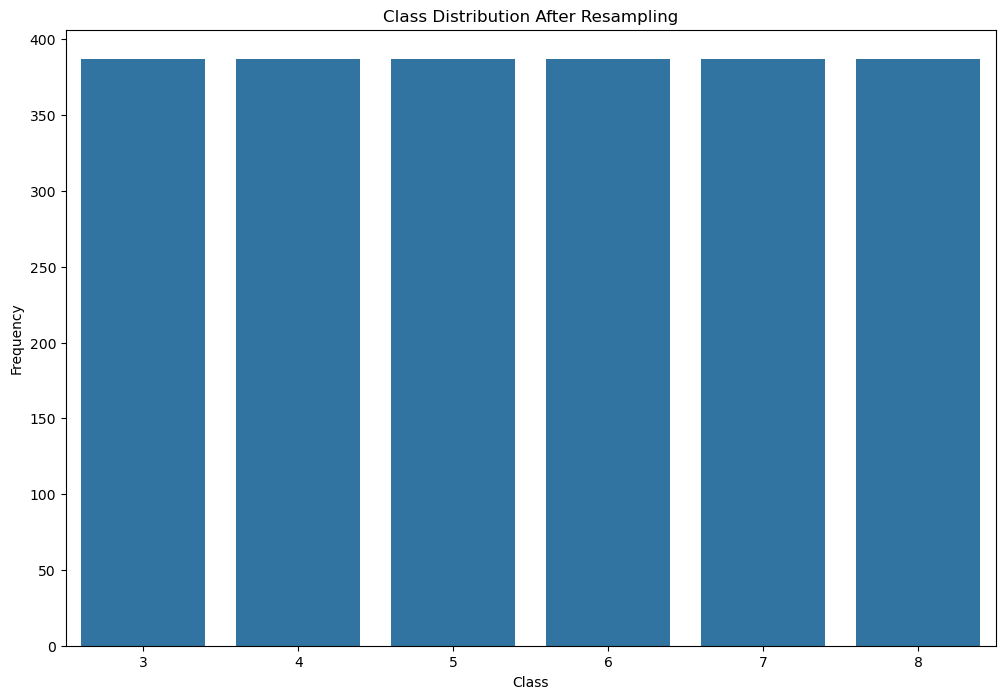

In [361]:
plt.figure(figsize=(12,8))
sns.countplot(x=YtrainResampled)
plt.title('Class Distribution After Resampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Classification

# Algorithm Spot-Checking

### Import libraries

In [362]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Build Models

Logistic Regression (LR).

Linear Discriminant Analysis (LDA).

k-Nearest Neighbors (KNN).

Classification and Regression Trees (CART).

Gaussian Naive Bayes (NB).

Support Vector Machines (SVM).

In [363]:
 # Spot-Check Algorithms
 models = []
 models.append(('LR', LogisticRegression()))
 models.append(('LDA', LinearDiscriminantAnalysis()))
 models.append(('KNN', KNeighborsClassifier()))
 models.append(('CART', DecisionTreeClassifier()))
 models.append(('NB', GaussianNB()))
 models.append(('SVM', SVC()))

LR: 0.310942 (0.034276)
LDA: 0.568893 (0.037136)
KNN: 0.762278 (0.022219)
CART: 0.866501 (0.024483)
NB: 0.506882 (0.035753)
SVM: 0.303620 (0.023476)


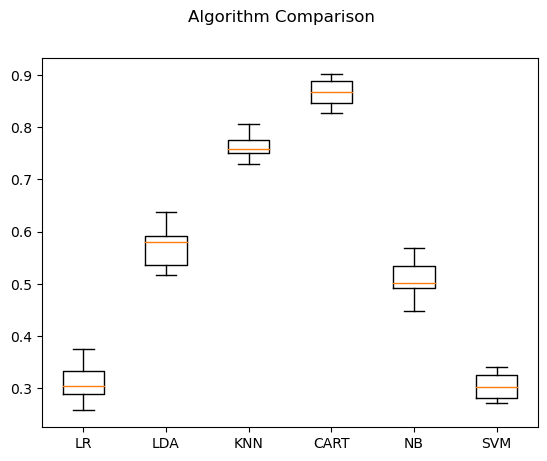

In [364]:
 results = []
 names = []
 from sklearn.model_selection import StratifiedKFold

 for name, model in models:
      kfold = StratifiedKFold(n_splits=10)
      cv_results = cross_val_score(model, XtrainResampled, YtrainResampled, cv=kfold, scoring='accuracy')
      results.append(cv_results)
      names.append(name)
      msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
      print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Evaluate Algorithms: Standardize Data

In [365]:
from sklearn.pipeline import Pipeline

In [366]:
from sklearn.preprocessing import StandardScaler

ScaledLR: 0.531077 (0.200635)
ScaledLDA: 0.456094 (0.184895)
ScaledKNN: 0.784448 (0.208941)
ScaledCART: 0.865395 (0.165640)
ScaledNB: 0.496644 (0.187495)
ScaledSVM: 0.718483 (0.177496)


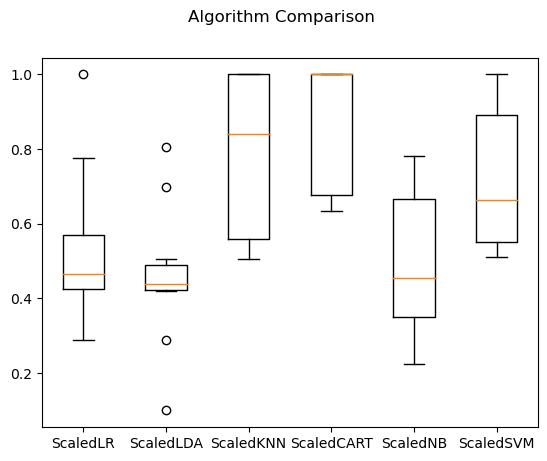

In [367]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10 )
    cv_results = cross_val_score(model,XtrainResampled, YtrainResampled,  cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Evaluate Algorithms:  Rescale Data

In [368]:
from sklearn.preprocessing import MinMaxScaler


ScaledLR: 0.402706 (0.237012)
ScaledLDA: 0.456094 (0.184895)
ScaledKNN: 0.783567 (0.204142)
ScaledCART: 0.865824 (0.165001)
ScaledNB: 0.496644 (0.187495)
ScaledSVM: 0.667210 (0.168088)


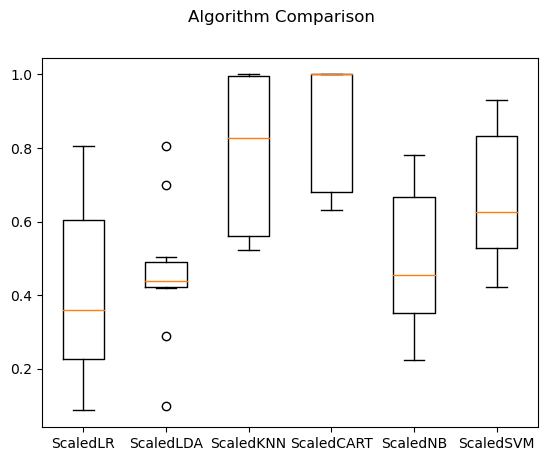

In [369]:
# Rescale the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('NB',GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10 )
    cv_results = cross_val_score(model,XtrainResampled, YtrainResampled,  cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Evaluate Algorithms:  Normalize Data

In [370]:
from sklearn.preprocessing import Normalizer

ScaledLR: 0.021959 (0.030192)
ScaledLDA: 0.260036 (0.133488)
ScaledKNN: 0.737548 (0.250015)
ScaledCART: 0.845146 (0.190283)
ScaledNB: 0.253400 (0.238701)
ScaledSVM: 0.027555 (0.036322)


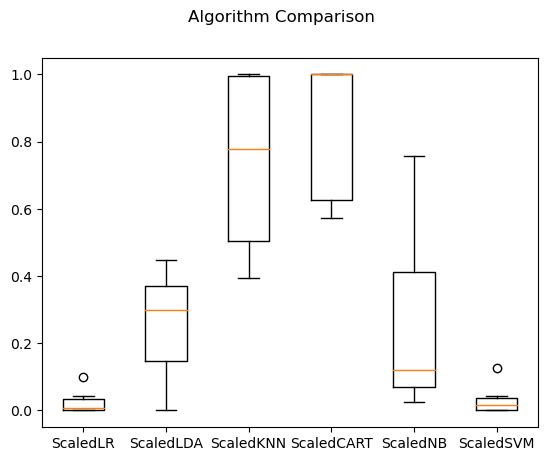

In [371]:
# Normalize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler',Normalizer()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', Normalizer()),('LDA',LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', Normalizer()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', Normalizer()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', Normalizer()),('NB',GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', Normalizer()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10 )
    cv_results = cross_val_score(model,XtrainResampled, YtrainResampled,  cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Improve Performance with tuning the CART

In [372]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Load your dataset (replace this with your dataset)
# Assume 'df' contains the data and 'quality' is the target variable
# Example: df = pd.read_csv("your_dataset.csv")
x = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and validation sets (40% validation set)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.4, stratify=y, random_state=42)

# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

# Address class imbalance with RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
print("Resampled class distribution:", Counter(y_train_resampled))

# Initialize the DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required to be a leaf node
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

# Set up cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform GridSearchCV for parameter tuning
grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    cv=kfold, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1
)

# Fit the model to the resampled training data
grid_search.fit(x_train_resampled, y_train_resampled)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Train the model on the full resampled training set
best_model.fit(x_train_resampled, y_train_resampled)

# Validate the model on the validation set
y_val_pred = best_model.predict(x_val)

# Evaluate performance on the validation set
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report (Validation):\n", classification_report(y_val, y_val_pred))


Resampled class distribution: Counter({6: 289, 8: 289, 5: 289, 7: 289, 4: 289, 3: 289})
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8506411534117333
Validation Accuracy: 0.5982532751091703

Classification Report (Validation):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.66      0.74      0.70       194
           6       0.59      0.53      0.56       185
           7       0.52      0.54      0.53        57
           8       0.14      0.14      0.14         7

    accuracy                           0.60       458
   macro avg       0.32      0.33      0.32       458
weighted avg       0.59      0.60      0.59       458



# Select the best hyperparameters and improve Performance

In [376]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


Cross-Validation Accuracy Scores: [0.87179487 0.85470085 0.87068966 0.89655172 0.85344828 0.82758621
 0.86206897 0.81034483 0.87931034 0.86206897 0.85344828 0.87068966
 0.84482759 0.82758621 0.87068966 0.85344828 0.85344828 0.87931034
 0.87931034 0.89655172]
Mean CV Accuracy: 0.8608937518420279
Validation Accuracy: 0.5764192139737991

Classification Report (Validation):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        12
           5       0.62      0.55      0.59        96
           6       0.55      0.70      0.62        88
           7       0.59      0.59      0.59        29
           8       0.00      0.00      0.00         3

    accuracy                           0.58       229
   macro avg       0.29      0.31      0.30       229
weighted avg       0.55      0.58      0.56       229



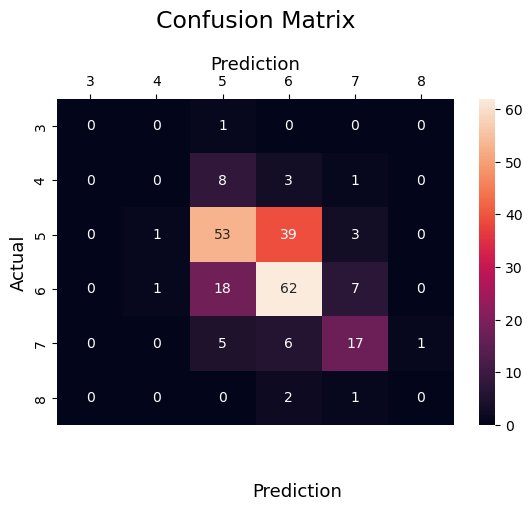

In [377]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load a sample dataset (Iris dataset as an example)
scaler = StandardScaler().fit(XtrainResampled)
XtrainResampled = scaler.transform(XtrainResampled)
df=df.drop("Id",axis=1)
x=df.drop('quality',axis=1)
y=df['quality']

# Split the data into training and validation sets (validation size = 20%)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
#x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
#x_val_resampled, y_val_resampled = ros.fit_resample(x_val, y_val)

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_trainResampled, y_trainResampled = ros.fit_resample(x_train, y_train)

# Initialize the SVM classifier with specified parameters
cart_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42  # Ensure reproducibility
)

# Set up 10-fold cross-validation
kfold = StratifiedKFold(n_splits=20)

# Perform cross-validation on the training data
cv_scores = cross_val_score(cart_model, x_trainResampled, y_trainResampled, cv=kfold, scoring='accuracy')

# Train the SVM model on the full training set
model=cart_model.fit(x_trainResampled, y_trainResampled)

# Validate the model on the validation set
y_val_pred = model.predict(x_val)

# Evaluate performance
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report (Validation):\n", classification_report(y_val, y_val_pred))
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True,fmt='g',xticklabels=['3','4','5','6','7','8'],yticklabels=['3','4','5','6','7','8'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

# Improve Performance with Ensembles

In [ ]:
 from sklearn.ensemble import AdaBoostClassifier
 from sklearn.ensemble import GradientBoostingClassifier
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
 # ensembles
 ensembles = []
 ensembles.append(('AB', AdaBoostClassifier()))
 ensembles.append(('GBM', GradientBoostingClassifier()))
 ensembles.append(('RF', RandomForestClassifier()))
 ensembles.append(('DTC',DecisionTreeClassifier()))
 ensembles.append(('ET', ExtraTreesClassifier()))
 results = []
 names = []
 for name, model in ensembles:
      kfold = KFold(n_splits=10)
      cv_results = cross_val_score(model, XtrainResampled, YtrainResampled, cv=10, scoring='accuracy')
      results.append(cv_results)
      names.append(name)
      msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
      print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
pipelines.append(('ScaledDTC', Pipeline([('Scaler', StandardScaler()),('DTC',DecisionTreeClassifier())])))
pipelines.append(('ScaledETC', Pipeline([('Scaler', StandardScaler()),('ETC', ExtraTreesClassifier())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10 )
    cv_results = cross_val_score(model,XtrainResampled, YtrainResampled,  cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
 from sklearn.model_selection import GridSearchCV

In [ ]:
scoring='accuracy'

# Selected Model with Parameter Tuning

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Load your dataset (replace this with your dataset)
# Assume 'df' contains the data and 'quality' is the target variable
# Example: df = pd.read_csv("your_dataset.csv")
x = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and validation sets (40% validation set)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.4, stratify=y, random_state=42)

# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

# Address class imbalance with RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
print("Resampled class distribution:", Counter(y_train_resampled))

# Initialize the ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required to be a leaf node
}

# Set up cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform GridSearchCV for parameter tuning
grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    cv=kfold, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1
)

# Fit the model to the resampled training data
grid_search.fit(x_train_resampled, y_train_resampled)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Train the model on the full resampled training set
best_model.fit(x_train_resampled, y_train_resampled)

# Validate the model on the validation set
y_val_pred = best_model.predict(x_val)

# Evaluate performance on the validation set
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report (Validation):\n", classification_report(y_val, y_val_pred))


# Finalize the model for Classification

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load a sample dataset (Iris dataset as an example)
scaler = StandardScaler().fit(XtrainResampled)
XtrainResampled = scaler.transform(XtrainResampled)
x=df.drop('quality',axis=1)
y=df['quality']

# Split the data into training and validation sets (validation size = 20%)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.4)

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_trainResampled, y_trainResampled = ros.fit_resample(x_train, y_train)

# Initialize the SVM classifier with specified parameters
model1 = ExtraTreesClassifier(max_depth=None, 
    min_samples_leaf=1, 
    min_samples_split=5, 
    n_estimators=200, 
    random_state=42)

# Set up 10-fold cross-validation
kfold = StratifiedKFold(n_splits=20)

# Perform cross-validation on the training data
cv_scores = cross_val_score(model1, x_trainResampled, y_trainResampled, cv=kfold, scoring='accuracy')

# Train the SVM model on the full training set
model1.fit(x_trainResampled, y_trainResampled)

# Validate the model on the validation set
y_val_pred = model1.predict(x_val)

# Evaluate performance
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report (Validation):\n", classification_report(y_val, y_val_pred))

# Regression

### Evaluate Algorithms: Spot-check

# Load libraries

In [ ]:
 # Load libraries
 import numpy
 from numpy import arange
 from matplotlib import pyplot
 from pandas import read_csv
 from pandas import set_option
 from sklearn.preprocessing import StandardScaler
 from sklearn.model_selection import train_test_split
 from sklearn.model_selection import KFold
 from sklearn.model_selection import cross_val_score
 from sklearn.model_selection import GridSearchCV
 from sklearn.linear_model import LinearRegression
 from sklearn.linear_model import Lasso
 from sklearn.linear_model import ElasticNet
 from sklearn.tree import DecisionTreeRegressor
 from sklearn.neighbors import KNeighborsRegressor
 from sklearn.svm import SVR
 from sklearn.pipeline import Pipeline
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.ensemble import GradientBoostingRegressor
 from sklearn.ensemble import ExtraTreesRegressor
 from sklearn.ensemble import AdaBoostRegressor
 from sklearn.metrics import mean_squared_error

# Validation Dataset

In [ ]:
df = df.drop(columns=['Id'], errors='ignore')

In [ ]:
x=df.drop('quality',axis=1)
y=df['quality']

In [ ]:
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y,test_size=validation_size)

In [ ]:
scoring = 'neg_mean_squared_error'

In [ ]:
 # Spot-Check Algorithms
 models = []
 models.append(('LR', LinearRegression()))
 models.append(('LASSO', Lasso()))
 models.append(('EN', ElasticNet()))
 models.append(('KNN', KNeighborsRegressor()))
 models.append(('CART', DecisionTreeRegressor()))
 models.append(('SVR', SVR()))

In [ ]:
 # evaluate each model in turn
 results = []
 names = []
 for name, model in models:
     kfold = KFold(n_splits=20)
     cv_results = cross_val_score(model,X_train, Y_train ,cv=kfold, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     print(name, cv_results.mean())

# Evaluate Algorithms: Standardization¶

In [ ]:
 import numpy
 from numpy import arange
 from matplotlib import pyplot
 from pandas import read_csv
 from pandas import set_option
 from pandas.plotting import scatter_matrix
 from sklearn.preprocessing import StandardScaler
 from sklearn.model_selection import train_test_split
 from sklearn.model_selection import KFold
 from sklearn.model_selection import cross_val_score
 from sklearn.model_selection import GridSearchCV
 from sklearn.linear_model import LinearRegression
 from sklearn.linear_model import Lasso
 from sklearn.linear_model import ElasticNet
 from sklearn.tree import DecisionTreeRegressor
 from sklearn.neighbors import KNeighborsRegressor
 from sklearn.svm import SVR
 from sklearn.pipeline import Pipeline
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.ensemble import GradientBoostingRegressor
 from sklearn.ensemble import ExtraTreesRegressor
 from sklearn.ensemble import AdaBoostRegressor
 from sklearn.metrics import mean_squared_error

In [ ]:
 pipelines = []
 pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
 pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
 pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
 pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
 pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
 pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
 results = []
 names = []
 for name, model in pipelines:
     kfold = KFold(n_splits=num_folds)
     cv_results = cross_val_score(model,X_train, Y_train, cv=kfold, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(msg)

# Improve Results With Tuning

In [ ]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
# Example: Replace 'X' and 'y' with your dataset
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the dataset
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# Define hyperparameters for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'epsilon': [0.1, 0.2, 0.5, 1.0],  # Epsilon in the epsilon-SVR model
    'kernel': ['linear', 'rbf'],      # Kernel type
    'gamma': ['scale', 'auto']        # Kernel coefficient
}

# Create the SVR model
model = SVR()

# Define cross-validation settings
num_folds = 5
kfold = KFold(n_splits=num_folds, random_state=42, shuffle=True)

# Perform GridSearchCV
scoring = 'neg_mean_squared_error'  # Metric for regression
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, n_jobs=-1)
grid_result = grid.fit(rescaledX, Y_train)

# Output the best parameters and performance
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))




In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import math
from sklearn.metrics import r2_score

# Example dataset (replace with your own data)
# Assuming X and y are already defined
# X, y = your_features, your_target

# Split the data into training and test sets

# Standardize the dataset
scaler = StandardScaler().fit(XtrainResampled)
rescaledX = scaler.transform(XtrainResampled)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
XtestResampled, YtestResampled = ros.fit_resample(X_validation, Y_validation)


# Initialize the Decision Tree Regressor with best parameters
model = DecisionTreeRegressor(
    criterion='poisson',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    random_state=42
)

# Train the model
model.fit(rescaledX,YtrainResampled)

# Predict on the test set
y_pred = model.predict(XtestResampled)

# Evaluate the model
mse = mean_squared_error(YtestResampled, y_pred)
print(f" Root Mean Squared Error: {math.sqrt(mse)}")





# Ensemble Methods

In [ ]:
scoring = 'neg_mean_squared_error'

In [ ]:
 ensembles = []
 ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',AdaBoostRegressor())])))
 ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',GradientBoostingRegressor())])))
 ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
 ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesRegressor())])))
 results = []
 names = []
 for name, model in ensembles:
     kfold = KFold(n_splits=num_folds)
     cv_results = cross_val_score(model,X_train, Y_train, cv=kfold, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(msg)

# Extra Trees Regressor with Tuning

In [ ]:
df.columns

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Load your dataset (replace this with your dataset)
# Assume 'df' contains the data and 'target' is the regression target variable
# Example: df = pd.read_csv("your_dataset.csv")
x = df.drop('quality', axis=1)  # Replace 'target' with your target variable name
y = df['quality']

# Split the data into training and validation sets (40% validation set)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.4, random_state=42)

# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

# Address imbalance (if applicable, for categorical targets in regression scenarios)
# Use oversampling only if necessary


# Initialize the ExtraTreesRegressor
model = ExtraTreesRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required to be a leaf node
}

# Set up cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform GridSearchCV for parameter tuning
grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    cv=kfold, 
    scoring='neg_mean_squared_error',  # Regression scoring
    n_jobs=-1, 
    verbose=1
)

# Fit the model to the resampled training data
grid_search.fit(x_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation MSE:", -grid_search.best_score_)

# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Train the model on the full resampled training set
best_model.fit(x_train, y_train)

# Validate the model on the validation set
y_val_pred = best_model.predict(x_val)

# Evaluate performance on the validation set
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
print("Validation MSE:", mse)
print("Validation MAE:", mae)


In [ ]:
X_train.shape

In [ ]:
X_test.shape

# Finalize the model for Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import math
from sklearn.metrics import r2_score

# Example dataset (replace with your own data)
# Assuming X and y are already defined
# X, y = your_features, your_target

# Split the data into training and test sets
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = train_test_split(x, y,test_size=validation_size)

# Standardize the dataset
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
rescaledTestX = scaler.transform(X_validation)


# Initialize the Decision Tree Regressor with best parameters
model = ExtraTreesRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)


# Train the model
model.fit(rescaledX,Y_train)

# Predict on the test set
y_pred = model.predict(rescaledTestX)

# Evaluate the model
mse = mean_squared_error(Y_validation, y_pred)
print(f" Root Mean Squared Error: {math.sqrt(mse)}")
print(f" R^2 Score: {r2_score(Y_validation, y_pred)}")

